In [2]:
import pandas as pd
import numpy as np

In [2]:
import time
from transformers import pipeline
import pandas as pd
import requests
from selenium import webdriver
import bs4

driver = webdriver.Chrome('/Users/junho/Downloads/chromedriver')
url = 'https://www.federalreserve.gov/newsevents/testimony.htm'
driver.get(url)
driver.implicitly_wait(2)
driver.set_window_size(2560, 1440)
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').click()
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').clear()
driver.implicitly_wait(2)
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[2]/div/div[1]/input').send_keys(
    '07/01/2010')
driver.implicitly_wait(2)

# submit
driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/form/div[5]/a/span').click()
driver.implicitly_wait(2)
writing_list = []
bs_obj = bs4.BeautifulSoup(driver.page_source)
'''
time_tags = bs_obj.find_all('time', {'class': 'itemDate ng-binding'})
time_data = [i.text for i in time_tags]
time_data
'''
time_data = []
root_path = 'https://www.federalreserve.gov'
time.sleep(2)
cnt = 0
for i in range(7):
    bs_obj = bs4.BeautifulSoup(driver.page_source)
    target = bs_obj.find('div', {'id': 'article'})
    atags = target.find_all('a')
    time_tags = bs_obj.find_all('time', {'class': 'itemDate ng-binding'})
    for j in time_tags:
        if j.text == '9/25/2019':
            cnt += 1
            if cnt == 2:
                time_data.append(j.text)
        else:
            time_data.append(j.text)
    for a in atags:
        if 'item.title' in str(a):
            try:
                url = ''
                url = root_path + a['href']
                res = requests.get(url)
                bs_obj = bs4.BeautifulSoup(res.text)
                data = bs_obj.find('div',{'class':'col-xs-12 col-sm-8 col-md-8'})
                it = data.find_all('p') # []
                all = ''
                for dialogue in it:
                    #if 'fn1' in str(dialogue):
                    #    break
                    all += dialogue.text
                writing_list.append(all.replace('\n',' ').replace('\t',' ').replace('\r',' '))
                print(url)
            except:
                pass
    print(f'page{i+1}')
    time.sleep(4)
    driver.find_element_by_xpath('//*[@id="article"]/ul[1]/li[9]/a').click()
    time.sleep(1)

len(writing_list)
len(time_data)
df = pd.DataFrame()
df['date'] = time_data
df['target'] = writing_list

https://www.federalreserve.gov/newsevents/testimony/powell20220302a.htm
https://www.federalreserve.gov/newsevents/testimony/brainard20220113a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20220111a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20211130a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210928a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210714a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210622a.htm
https://www.federalreserve.gov/newsevents/testimony/quarles20210519a.htm
https://www.federalreserve.gov/newsevents/testimony/vanderweide20210415a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210323a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20210223a.htm
https://www.federalreserve.gov/newsevents/testimony/powell20201201a.htm
https://www.federalreserve.gov/newsevents/testimony/quarles20201110a.htm
https://www.federalreserve.gov/newsevents/testimony/pow

ConnectionResetError: [Errno 54] Connection reset by peer

In [3]:
testimony = pd.read_csv('/Users/junho/Downloads/testimony2010-2022_without_nomination_hearing.csv')
date = testimony['date']
testimony_ = testimony['target']

In [4]:
qa = pipeline("question-answering")
sentiment = pipeline("sentiment-analysis")
data = []
for i in range(len(testimony_)):
    a = qa(question = 'Can you achieve economic growth?', context = testimony_[i])
    senti = sentiment(a.get('answer'))
    print(a)
    print(senti)
    print(date[i])
    data.append(senti[0].values())


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
2022-04-19 14:12:44.865279: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDi

{'score': 0.043098922818899155, 'start': 5845, 'end': 5889, 'answer': 'maximum-employment and price-stability goals'}
[{'label': 'POSITIVE', 'score': 0.9939809441566467}]
2022-03-02
{'score': 0.28258368372917175, 'start': 2751, 'end': 2851, 'answer': 'We are strongly committed to achieving our statutory goals of maximum employment and price stability'}
[{'label': 'POSITIVE', 'score': 0.999062716960907}]
2022-01-11
{'score': 0.04576058313250542, 'start': 254, 'end': 293, 'answer': 'The economy has continued to strengthen'}
[{'label': 'POSITIVE', 'score': 0.9995342493057251}]
2021-11-30
{'score': 0.32122305035591125, 'start': 707, 'end': 781, 'answer': 'growth is widely expected to continue at a strong pace in the second half.'}
[{'label': 'POSITIVE', 'score': 0.9994558691978455}]
2021-09-28
{'score': 0.3648337125778198, 'start': 1218, 'end': 1244, 'answer': 'increasing at a solid pace'}
[{'label': 'POSITIVE', 'score': 0.9998701810836792}]
2021-07-14
{'score': 0.11082787066698074, 'start

{'score': 0.19794698059558868, 'start': 5294, 'end': 5343, 'answer': 'economic growth could also exceed our projections'}
[{'label': 'POSITIVE', 'score': 0.9983929991722107}]
2016-02-10
{'score': 0.30782654881477356, 'start': 1586, 'end': 1678, 'answer': 'Many economic forecasters expect growth roughly along those same lines in the fourth quarter'}
[{'label': 'NEGATIVE', 'score': 0.9823144674301147}]
2015-12-03
{'score': 0.4855736792087555, 'start': 22282, 'end': 22307, 'answer': 'Loan growth is picking up'}
[{'label': 'POSITIVE', 'score': 0.9965272545814514}]
2015-11-04
{'score': 0.17827190458774567, 'start': 1651, 'end': 1719, 'answer': 'the Federal Reserve moved quickly to develop a supervisory framework'}
[{'label': 'NEGATIVE', 'score': 0.8568278551101685}]
2015-09-29
{'score': 0.1881110966205597, 'start': 2824, 'end': 2851, 'answer': 'moderate pace of GDP growth'}
[{'label': 'POSITIVE', 'score': 0.9969221949577332}]
2015-07-15
{'score': 0.04192998260259628, 'start': 1777, 'end': 1

{'score': 0.012940272688865662, 'start': 1392, 'end': 1451, 'answer': 'potential to expand access to mainstream financial services'}
[{'label': 'POSITIVE', 'score': 0.9993533492088318}]
2012-03-29
{'score': 0.23626865446567535, 'start': 8403, 'end': 8451, 'answer': 'The situation in Europe is continuously evolving'}
[{'label': 'POSITIVE', 'score': 0.9865124225616455}]
2012-03-27
{'score': 0.037058647722005844, 'start': 7254, 'end': 7304, 'answer': 'Work on the NSFR is on a considerably slower track'}
[{'label': 'NEGATIVE', 'score': 0.9996755123138428}]
2012-03-22
{'score': 0.19557048380374908, 'start': 3993, 'end': 4038, 'answer': 'continued efforts to increase economic growth'}
[{'label': 'POSITIVE', 'score': 0.9995237588882446}]
2012-03-21
{'score': 0.027262313291430473, 'start': 1879, 'end': 1949, 'answer': 'a process for the receipt and review of borrower claims and complaints'}
[{'label': 'NEGATIVE', 'score': 0.6213454008102417}]
2012-03-19
{'score': 0.06008530035614967, 'start': 

{'score': 0.05900746211409569, 'start': 4740, 'end': 4763, 'answer': 'stalled economic growth'}
[{'label': 'NEGATIVE', 'score': 0.9954609274864197}]
2010-09-01
{'score': 0.05965038016438484, 'start': 410, 'end': 423, 'answer': 'moderate pace'}
[{'label': 'POSITIVE', 'score': 0.998223602771759}]
2010-07-21
{'score': 0.21968618035316467, 'start': 1793, 'end': 1854, 'answer': 'financial stresses can quickly spread across national borders'}
[{'label': 'NEGATIVE', 'score': 0.9170272946357727}]
2010-07-20


In [5]:
score1 = []
for i in data:
    if list(i)[0] == 'NEGATIVE':
        score1.append(-list(i)[1])
    else:
        score1.append(list(i)[1])


In [6]:
score_df = pd.DataFrame()
score_df['Q1'] = score1

score_df['date'] = date
score_df['date'] = pd.to_datetime(score_df['date'],format='%Y-%m-%d')

score_df['year'] = score_df['date'].dt.year
score_df['quarter'] = score_df['date'].dt.quarter
score_df = score_df.groupby(by=[score_df['year'],score_df['quarter']]).mean()
score_df.to_csv('/Users/junho/Downloads/testimony1.csv')
score_df

Q1
year quarter          
2010 3        0.014537
     4        0.006298
2011 1       -0.462258
     2        0.797096
     3        0.345389
     4        0.479481
2012 1        0.270508
     2        0.662740
     3        0.932809
     4        0.998409
2013 1        0.321590
     2        0.599296
     3        0.015978
     4        0.999745
2014 1        0.930044
     2        0.998851
     3        0.432019
     4        0.008891
2015 1       -0.325451
     2        0.071191
     3        0.070047
     4        0.007106
2016 1        0.998393
     2        0.002068
     3        0.997880
     4       -0.640552
2017 1        0.999466
     2        0.999670
     3        0.998908
     4        0.997013
2018 1        0.999529
     2        0.999425
     3        0.879740
     4        0.996489
2019 1        0.998110
     2        0.998962
     3       -0.332461
     4        0.319638
2020 1        0.999031
     2        0.597694
     3       -0.278174
     4       -0.160328
2021 1        0.002008
     2        0.333228
     3        0.999663
     4        0.999534
2022 1        0.996522

<AxesSubplot:xlabel='year,quarter'>

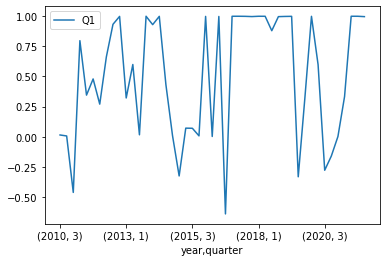

In [7]:
score_df.plot()

# 비정형 데이터 평균값 그래프

In [3]:
df = pd.read_csv('./../../data/df.csv')
df

,Unnamed: 0,year,quarter,testimony,minutes,beige,speech1,speech2,btr,btc,inf,uem,itr,label
0,1,2010,4,0.006298,0.999464,0.962157,0.214615,0.016168,109.861229,0.3,1.22978,9.500000,0.19,0.0
1,2,2011,1,-0.462258,0.994393,0.998924,0.142740,0.138890,98.082925,0.8,2.14822,9.033333,0.17,0.0
2,3,2011,2,0.797096,0.998627,0.027240,0.606771,0.370122,300.196282,16.1,3.34611,9.066667,0.10,0.0
3,4,2011,3,0.345389,-0.999317,-0.999372,0.460445,0.175324,-114.957873,5.1,3.71595,9.000000,0.07,0.0
4,5,2011,4,0.479481,0.994647,0.995748,0.001555,-0.186537,-8.167803,4.7,3.34473,8.633333,0.07,0.0
5,6,2012,1,0.270508,0.998202,0.019599,0.796364,0.395139,4.167270,4.9,2.82932,8.266667,0.08,1.0
6,7,2012,2,0.662740,0.999127,0.999800,0.193265,-0.008554,31.287232,6.7,1.88792,8.200000,0.14,1.0
7,8,2012,3,0.932809,0.000188,-0.997239,0.669289,0.356781,61.558895,12.4,1.68486,8.033333,0.16,0.0
8,9,2012,4,0.998409,-0.999350,0.150898,0.354380,0.024408,8.499321,13.5,1.90357,7.800000,0.16,0.0
9,10,2013,1,0.321590,0.000007,0.000078,0.438148,-0.254101,192.990981,93.0,1.74020,7.733333,0.14,0.0


In [18]:
# 각 컬럼을 섹션으로 나눠 평균 계산 
def averaging(column):
    section1 = []
    section2 = []
    section3 = []
    for i in range(len(df)):
        if i <= 24:
            section1.append(df[column][i])
        elif i <= 37:
            section2.append(df[column][i])
        else:
            section3.append(df[column][i])
    df[column][:25] = np.mean(section1)
    df[column][25:38] = np.mean(section2)
    df[column][38:] = np.mean(section3)
    return df

averaging('testimony')
averaging('minutes')
averaging('beige')
averaging('speech1')
averaging('speech2')

/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][:25] = np.mean(section1)
/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][25:38] = np.mean(section2)
/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_43061/1371610036.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,Unnamed: 0,year,quarter,testimony,minutes,beige,speech1,speech2,btc,inf,uem,label,FEDfunds
0,0,2010,4,0.380703,0.438238,0.204732,0.379057,0.063223,109.861229,1.22978,9.500000,0.0,0.186667
1,1,2011,1,0.380703,0.438238,0.204732,0.379057,0.063223,98.082925,2.14822,9.033333,0.0,0.156667
2,2,2011,2,0.380703,0.438238,0.204732,0.379057,0.063223,300.196282,3.34611,9.066667,0.0,0.093333
3,3,2011,3,0.380703,0.438238,0.204732,0.379057,0.063223,-114.957873,3.71595,9.000000,0.0,0.083333
4,4,2011,4,0.380703,0.438238,0.204732,0.379057,0.063223,-8.167803,3.34473,8.633333,0.0,0.073333
5,5,2012,1,0.380703,0.438238,0.204732,0.379057,0.063223,4.167270,2.82932,8.266667,1.0,0.103333
6,6,2012,2,0.380703,0.438238,0.204732,0.379057,0.063223,31.287232,1.88792,8.200000,1.0,0.153333
7,7,2012,3,0.380703,0.438238,0.204732,0.379057,0.063223,61.558895,1.68486,8.033333,0.0,0.143333
8,8,2012,4,0.380703,0.438238,0.204732,0.379057,0.063223,8.499321,1.90357,7.800000,0.0,0.160000
9,9,2013,1,0.380703,0.438238,0.204732,0.379057,0.063223,192.990981,1.74020,7.733333,0.0,0.143333


<AxesSubplot:>

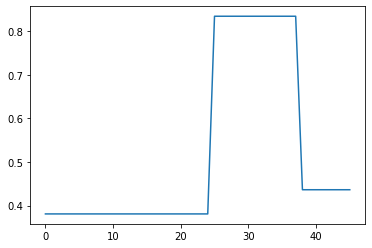

In [19]:
df['testimony'].plot()

<AxesSubplot:>

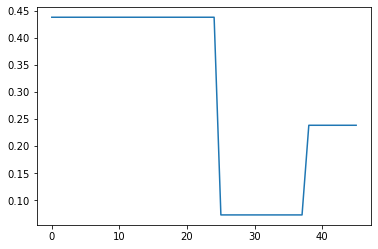

In [20]:
df['minutes'].plot()

<AxesSubplot:>

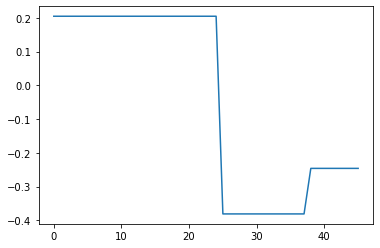

In [21]:
df['beige'].plot()

<AxesSubplot:>

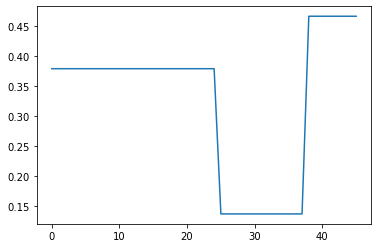

In [22]:
df['speech1'].plot()

<AxesSubplot:>

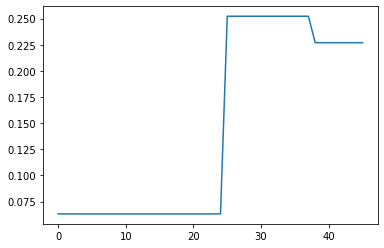

In [23]:
df['speech2'].plot()